In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [178]:
def calculate_overall_rmse(df):
    """
    Calculate the overall RMSE across x, y, z, and yaw compared to their reference values.
    
    Parameters:
    df (pandas.DataFrame): DataFrame containing the actual values and reference values.
    
    Returns:
    float: The overall RMSE across all dimensions.
    """
    
    # Extract actual and reference values as numpy arrays
    actual_values = df[['x', 'y', 'z', 'yaw']].to_numpy()
    reference_values = df[['x_ref', 'y_ref', 'z_ref', 'yaw_ref']].to_numpy()
    actual_values = actual_values[83:]
    reference_values = reference_values[3:-80]
    
    # Compute the squared differences
    squared_errors = (actual_values - reference_values) ** 2
    
    # Compute the mean of the sum of squared differences across all dimensions
    mse = np.mean(np.sum(squared_errors, axis=1))
    
    # Return the square root of the mean squared error (overall RMSE)
    overall_rmse = np.sqrt(mse)
    
    return overall_rmse

In [179]:
log_file_path = 'log1.log'

# Reading the .log file into a pandas DataFrame
df_log = pd.read_csv(log_file_path, header=0, dtype={'metadata': str})

# Display the first few rows to confirm successful import
df_log.head()

,time,x,y,z,yaw,throttle,roll_rate,pitch_rate,yaw_rate,x_ref,y_ref,z_ref,yaw_ref,pred_time,nr_time,metadata
0,0.000002,-0.058280,-0.047910,-0.154040,-0.002158,-0.719959,0.116611,-0.326694,0.000809,0.555705,0.226257,-0.8,0.0,0.283926,0.284098,Sim
1,0.285453,-0.058280,-0.047910,-0.154040,-0.002158,-0.732413,0.235399,-0.468686,0.001376,0.519308,0.300532,-0.8,0.0,0.000562,0.000660,Jax
2,0.289975,-0.059353,-0.047485,-0.156530,-0.002269,-0.742483,0.317397,-0.568080,0.001814,0.518650,0.301666,-0.8,0.0,0.000537,0.000639,1stOrderHold
3,0.300010,-0.059384,-0.047505,-0.156585,-0.002276,-0.751054,0.372991,-0.637656,0.002123,0.517180,0.304179,-0.8,0.0,0.000613,0.000715,QuatYawError
4,0.310533,-0.059412,-0.047516,-0.156653,-0.002301,-0.758482,0.409839,-0.686359,0.002349,0.515627,0.306805,-0.8,0.0,0.000831,0.000963,NoPyJoules


In [180]:
print(f"This data comes from: {df_log['metadata'][0]}")
print(f"Predictor was: {df_log['metadata'][1]}")
print(f"(Valid for Nonlin predictor only) Predictor was: {df_log['metadata'][2]}")
print(f"For yaw error we used: {df_log['metadata'][3]}")
print(f"RMSE: {calculate_overall_rmse(df_log)}")


This data comes from: Sim
Predictor was: Jax
(Valid for Nonlin predictor only) Predictor was: 1stOrderHold
For yaw error we used: QuatYawError
RMSE: 0.265750124299068


In [181]:
def plot_adjusted_avg_and_max_xyz_vs_reference(df):
    fig, axs = plt.subplots(4, 4, figsize=(20, 12), sharex=False)
    time_max = df['time'].max()
    time_min = df['time'].min()
    x_lim = (time_min-1, time_max+1)
    
    # Maximum values
    max_throttle = 1.0
    min_throttle = 0.0
    rates_max_abs = 0.8
    max_rate = rates_max_abs
    min_rate = -rates_max_abs


    # Row 1: Plot x, y, z, psi vs references
    # plot x vs x_ref
    axs[0, 0].plot(df['time'][3:][:-80], df['x'][3:][80:], label='x', color='red')
    axs[0, 0].plot(df['time'][3:][:-80], df['x_ref'][3:][:-80], label='x_ref', color='blue', linestyle='--')
    axs[0, 0].set_ylabel('x / x_ref')
    axs[0, 0].set_xlabel('time')
    axs[0, 0].legend()
    axs[0, 0].set_xlim(x_lim)

    # plot y vs y_ref
    axs[0, 1].plot(df['time'][3:][:-80], df['y'][3:][80:], label='y', color='red')
    axs[0, 1].plot(df['time'][3:][:-80], df['y_ref'][3:][:-80], label='y_ref', color='blue', linestyle='--')
    axs[0, 1].set_ylabel('y / y_ref')
    axs[0, 1].set_xlabel('time')
    axs[0, 1].legend()
    axs[0, 1].set_xlim(x_lim)

    # plot z vs z_ref
    axs[0, 2].plot(df['time'][3:][:-80], -1*df['z'][3:][80:], label='z', color='red')
    axs[0, 2].plot(df['time'][3:][:-80], -1*df['z_ref'][3:][:-80], label='z_ref', color='blue', linestyle='--')
    axs[0, 2].set_ylabel('z / z_ref')
    axs[0, 2].set_xlabel('time')
    axs[0, 2].legend()
    axs[0, 2].set_xlim(x_lim)
    axs[0, 2].set_ylim(0,-1*df['z'].min()+.1)


    # plot psi vs psi_ref
    axs[0, 3].plot(df['time'][3:][:-80], df['yaw'][3:][80:], label='psi', color='red')
    axs[0, 3].plot(df['time'][3:][:-80], df['yaw_ref'][3:][:-80], label='psi_ref', color='blue', linestyle='--')
    axs[0, 3].set_ylabel('psi / psi_ref')
    axs[0, 3].set_xlabel('time')
    axs[0, 3].legend()
    axs[0, 3].set_xlim(x_lim)

    # Row 2: Plot cross comparisons (x vs y, x vs z, y vs z, time vs solve_time)
    # plot x vs y and x_ref vs y_ref
    axs[1, 0].plot(df['x'][3:][80:], df['y'][3:][80:], label='x vs y', color='red')
    axs[1, 0].plot(df['x_ref'][3:][:-80], df['y_ref'][3:][:-80], label='x_ref vs y_ref', color='blue', linestyle='--')
    axs[1, 0].set_ylabel('y')
    axs[1, 0].set_xlabel('x')
    axs[1, 0].legend()

    # plot x vs z and x_ref vs z_ref
    axs[1, 1].plot(df['x'][3:][80:], -1*df['z'][3:][80:], label='x vs z', color='red')
    axs[1, 1].plot(df['x_ref'][3:][:-80], -1*df['z_ref'][3:][:-80], label='x_ref vs z_ref', color='blue', linestyle='--')
    axs[1, 1].set_ylabel('z')
    axs[1, 1].set_xlabel('x')
    axs[1, 1].set_ylim(0,-1*df['z'].min()+.1)
    axs[1, 1].legend()

    # plot y vs z and y_ref vs z_ref
    axs[1, 2].plot(df['y'][3:][80:], -1*df['z'][3:][80:], label='y vs z', color='red')
    axs[1, 2].plot(df['y_ref'][3:][:-80], -1*df['z_ref'][3:][:-80], label='y_ref vs z_ref', color='blue', linestyle='--')
    axs[1, 2].set_ylabel('z')
    axs[1, 2].set_xlabel('y')
    axs[1, 2].set_ylim(0,-1*df['z'].min()+.1)
    axs[1, 2].legend()

    # plot time vs solve_time
    axs[1, 3].plot(df['time'], df['nr_time']* 1e-9, label='solve_time', color='purple')
    axs[1, 3].set_ylabel('solve_time')
    axs[1, 3].set_xlabel('time')
    axs[1, 3].legend()
    axs[1, 3].set_xlim(x_lim)

    # Row 3: Plot fx, fy, fz, tauz vs time
    # plot throttle vs time
    axs[2, 0].plot(df['time'], -1*df['throttle'], label='throttle', color='blue')
    axs[2, 0].axhline(y=max_throttle, color='red', linestyle='--', label=f'+{max_throttle}')
    axs[2, 0].axhline(y=min_throttle, color='red', linestyle='--', label=f'-{max_throttle}')
    axs[2, 0].set_ylabel('throttle')
    axs[2, 0].set_xlabel('time')
    axs[2, 0].legend()
    axs[2, 0].set_ylim((-0.2, 1.2))
    axs[2, 0].set_xlim(x_lim)

    # plot roll_rate vs time
    axs[2, 1].plot(df['time'], df['roll_rate'], label='roll_rate', color='orange')
    axs[2, 1].axhline(y=max_rate, color='red', linestyle='--', label=f'+{max_rate}')
    axs[2, 1].axhline(y=min_rate, color='red', linestyle='--', label=f'-{min_rate}')
    axs[2, 1].set_ylabel('roll_rate')
    axs[2, 1].set_xlabel('time')
    axs[2, 1].legend()
    axs[2, 1].set_ylim((-1.0, 1.0))
    axs[2, 1].set_xlim(x_lim)

    # plot pitch_rate vs time
    axs[2, 2].plot(df['time'], df['pitch_rate'], label='pitch_rate', color='green')
    axs[2, 2].axhline(y=max_rate, color='red', linestyle='--', label=f'+{max_rate}')
    axs[2, 2].axhline(y=min_rate, color='red', linestyle='--', label=f'-{min_rate}')
    axs[2, 2].set_ylabel('pitch_rate')
    axs[2, 2].set_xlabel('time')
    axs[2, 2].legend()
    axs[2, 2].set_ylim((-1.0, 1.0))
    axs[2, 2].set_xlim(x_lim)

    # plot yaw_rate vs time
    axs[2, 3].plot(df['time'], df['yaw_rate'], label='yaw_rate', color='purple')
    axs[2, 3].axhline(y=max_rate, color='red', linestyle='--', label=f'+{max_rate}')
    axs[2, 3].axhline(y=min_rate, color='red', linestyle='--', label=f'-{min_rate}')
    axs[2, 3].set_ylabel('yaw_rate')
    axs[2, 3].set_xlabel('time')
    axs[2, 3].legend()
    axs[2, 3].set_ylim((-1.0, 1.0))
    axs[2, 3].set_xlim(x_lim)

    # Row 4: plot pred_time * nr_time vs time
    # plot pred_time vs time
    axs[3, 0].plot(df['time'][1:], df['pred_time'][1:], label='pred_time', color='blue')
    axs[3, 0].set_ylabel('pred_time')
    axs[3, 0].set_xlabel('time')
    axs[3, 0].legend()
    axs[3, 0].set_xlim(x_lim)

    # plot nr_time vs time
    axs[3, 1].plot(df['time'][1:], df['nr_time'][1:], label='nr_time', color='orange')
    axs[3, 1].set_ylabel('nr_time')
    axs[3, 1].set_xlabel('time')
    axs[3, 1].legend()
    axs[3, 1].set_xlim(x_lim)

    # # plot v_fz vs time
    # axs[3, 2].plot(df['time'], df['v_fz'], label='cbf_fz', color='green')
    # axs[3, 2].set_ylabel('v_fz')
    # axs[3, 2].set_xlabel('time')
    # axs[3, 2].legend()
    # axs[3, 2].set_xlim(x_lim)

    # # plot v_tz vs time
    # axs[3, 3].plot(df['time'], df['v_tz'], label='cbf_tauz', color='purple')
    # axs[3, 3].set_ylabel('v_tauz')
    # axs[3, 3].set_xlabel('time')
    # axs[3, 3].legend()
    # axs[3, 3].set_xlim(x_lim)
    

/tmp/ipykernel_116553/1510409262.py:17: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  axs[0, 0].plot(df['time'][3:][:-80], df['x'][3:][80:], label='x', color='red')
/tmp/ipykernel_116553/1510409262.py:18: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  axs[0, 0].plot(df['time'][3:][:-80], df['x_ref'][3:][:-80], label='x_ref', color='blue', linestyle='--')
/tmp/ipykernel_116553/1510409262.py:25: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. 

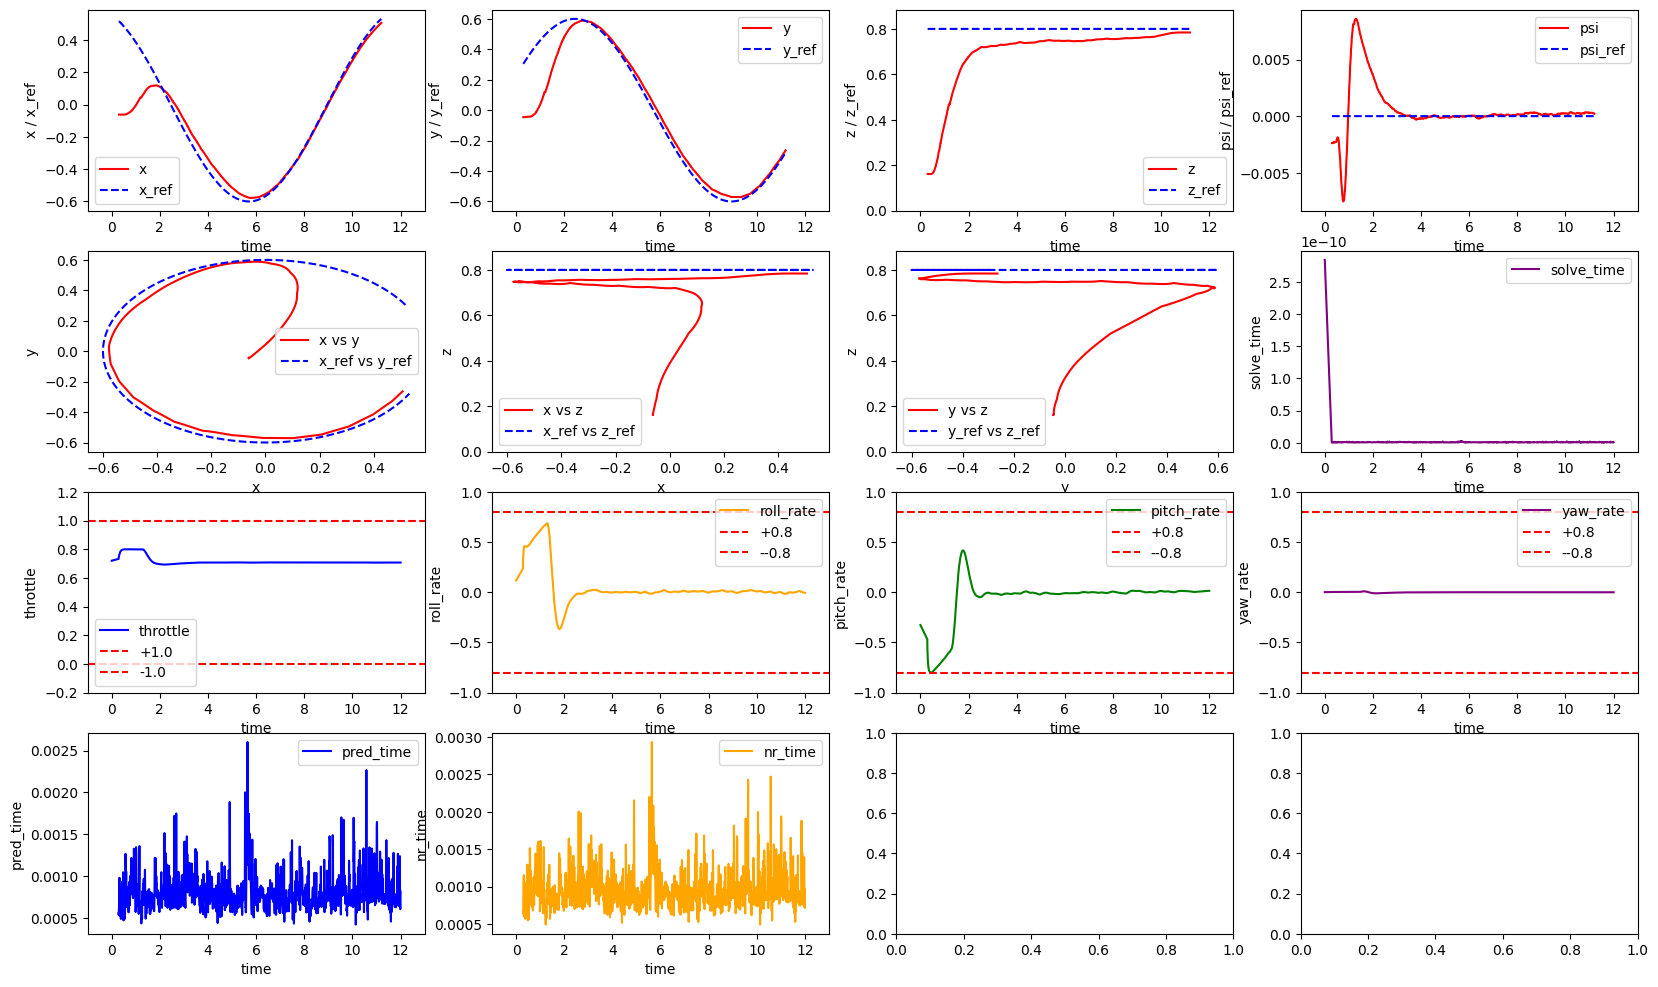

In [182]:
# Reuse the plotting function defined earlier for the uploaded .log data
plot_adjusted_avg_and_max_xyz_vs_reference(df_log)